In [58]:
#下面这行代码，是为了把自己编写的代码文件当作一共模块导入，这里是把Utilities文件夹中的plotting.py文件当作python的模块导入，对应的是下面的from plotting import newfig, savefig。路径要随着不同设备的系统做相应的修改
import sys #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
# sys.path.insert(0, '../../../Utilities/') #在 Python的sys.path列表中插入一个新的路径。sys.path是一个 Python 在导入模块时会查找的路径列表。新的路径'../../Utilities/'相对于当前脚本的路径。当你尝试导入一个模块时，Python 会在 sys.path 列表中的路径下查找这个模块。通过在列表开始位置插入一个路径，你可以让 Python 优先在这个路径下查找模块。这在你需要导入自定义模块或者不在 Python 标准库中的模块时非常有用。

import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号


# from plotting_torch import newfig, savefig #从自定义的plotting_torch.py文件中导入了newfig和savefig函数。这两个函数用于创建和保存图形。这两个函数的定义在plotting_torch.py文件中

from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。

import seaborn as sns  # 导入seaborn库用于绘制密度图

from sklearn.cluster import KMeans #sklearn是一个广泛使用的机器学习库，提供了各种算法和工具用于数据挖掘和分析。Kmeans是聚类算法，用于将数据分成预先指定数量的簇
import faiss #一种高效的相似性搜索和密集向量聚类库，适用于在大规模数据中进行高维向量的搜索和聚类操作
#faiss的安装方法：conda install -c conda-forge faiss-gpu
import matplotlib.cm as cm

In [59]:
import re
import pandas as pd

# 示例数据
methods_data = {
    'PINN': """
    [0.5138634337059544, 0.5139442566099618, 0.5145709489619981, 0.5134050003858026, 0.5137435187227776, 0.5121459269126543, 0.366070082686503, 0.5232695149603436, 0.05641613126684718, 0.5127521897426395]
    Error u of fuhe active learning(LHS sampling): 4.540181e-01
    [0.18869883018882527, 0.18893554629533396, 0.18938971024827214, 0.18877030149547394, 0.1895155252253112, 0.1880558421793314, 0.09707242564354608, 0.1948892741460637, 0.012780646979463257, 0.18853987986158116]
    MAE of fuhe active learning(LHS sampling): 1.626648e-01
    [0.13282715071156512, 0.13286893737942615, 0.13319316987492028, 0.13259025808317368, 0.13276516495415855, 0.13194072730775663, 0.06740931317005687, 0.1377343600504473, 0.001601024691247273, 0.13225328706793518]
    MSE of fuhe active learning(LHS sampling): 1.135183e-01
    """,
    'Active': """
    [0.5167405072498248, 0.514044742938601, 0.274928544039304, 0.5210823800309096, 0.5231767548095724, 0.24878267112159277, 0.5159753983106158, 0.514175486787315, 0.513750476840731, 0.5300824335436722]
    Error u of fuhe active learning(LHS sampling): 4.672739e-01
    [0.19018739733024856, 0.1889073011172612, 0.06190013891353853, 0.19360584779302836, 0.19329633295280668, 0.057815091386661174, 0.19111347837820541, 0.19040017268225295, 0.1891832941654387, 0.1990046659834234]
    MAE of fuhe active learning(LHS sampling): 1.655414e-01
    [0.13431868825625753, 0.13292089950091632, 0.03802166156195129, 0.1365853763624559, 0.1376855319524459, 0.031133767676702475, 0.13392122629654157, 0.13298852318651255, 0.13276876130876009, 0.14134428463796178]
    MSE of fuhe active learning(LHS sampling): 1.151689e-01
    """,
    'Residual': """
    [0.11963839122851265, 0.030824330860521162, 0.030312355708054576, 0.028961692235123272, 0.009589581930364726, 0.015765321595985357, 0.013170160854030047, 0.09744528812568404, 0.5129691373024808, 0.02094856580434456]
    Error u of fuhe active learning(LHS sampling): 8.796248e-02
    [0.022946181435142658, 0.0055746844853370395, 0.004491458992683739, 0.004952290447341951, 0.0017550903110990703, 0.002882865021814738, 0.0023040280142574807, 0.016948164959985242, 0.18864333709265216, 0.0034424969817988408]
    MAE of fuhe active learning(LHS sampling): 2.539406e-02
    [0.007200000994392376, 0.0004779459025781704, 0.0004622009191084509, 0.00042192892175832393, 4.625841792279154e-05, 0.00012502506705251492, 8.725163742986205e-05, 0.00477653666334025, 0.13236522456266253, 0.00022074964720265059]
    MSE of fuhe active learning(LHS sampling): 1.461831e-02
    """,
    'Fuhe': """
    [0.08333945951283456, 0.029496261138505578, 0.07665814806194686, 0.014370877635628289, 0.01308334701381296, 0.013306558421684295, 0.008570474950341155, 0.07989767455306308, 0.018165351442235404, 0.030847031909014402]
    Error u of fuhe active learning(LHS sampling): 3.677352e-02
    [0.014387634075119097, 0.0051464513176187904, 0.012403229261670435, 0.002282807220359224, 0.0024927479930840035, 0.002483720143804514, 0.0013204837512480804, 0.013002411370956115, 0.0037293857235853084, 0.005951571374139856]
    MAE of fuhe active learning(LHS sampling): 6.320044e-03
    [0.0034937577341197165, 0.0004376484216721627, 0.002956024803706549, 0.00010388623582106489, 8.610515412433548e-05, 8.906824961932026e-05, 3.694887393944454e-05, 0.0032111434417318933, 0.00016598889602781696, 0.00047865014290299283]
    MSE of fuhe active learning(LHS sampling): 1.105922e-03
    """,
    'Fuhechaos': """
    [0.07250242527489177, 0.031212474747064952, 0.05565586434455321, 0.010999654860823271, 0.016040820608480336, 0.013399717925635065, 0.007185386597451301, 0.08746351136219284, 0.00990399404668358, 0.023027888233165955]
    Error u of fuhe active learning(LHS sampling): 3.273917e-02
    [0.011422005078883257, 0.005509199169348013, 0.008304801166188524, 0.0017655748945345751, 0.0032213822671499997, 0.002537410518997661, 0.0011655516369993646, 0.01499172113469819, 0.0018187449042018583, 0.0034162130893294553]
    MAE of fuhe active learning(LHS sampling): 5.415260e-03
    [0.002644213366389271, 0.0004900583974102615, 0.0015581644483083142, 6.08624659070338e-05, 0.00012943287303810266, 9.031975273018793e-05, 2.5971181458682267e-05, 0.0038480902147106874, 4.934147962461441e-05, 0.0002667470672850193]
    MSE of fuhe active learning(LHS sampling): 9.163201e-04
    """,
    'Chaos': """
    [0.0330096268553925, 0.5173334174719045, 0.17947887624621212, 0.041876130790549554, 0.5190852897093937, 0.5177580702630193, 0.0174505154596534, 0.5136712806821667, 0.5144747246308397, 0.5143807788631218]
    Error u of fuhe active learning(LHS sampling): 3.368519e-01
    [0.005828138341393666, 0.19070070464553843, 0.04085396198563568, 0.007410186005626766, 0.19347709663699647, 0.19127349566777357, 0.002639287919593259, 0.1887917021401713, 0.1895027006269674, 0.19009615857542572]
    MAE of fuhe active learning(LHS sampling): 1.200573e-01
    [0.0005481162244861871, 0.13462710074253473, 0.01620384614108033, 0.0008821136095968649, 0.1355404336405046, 0.13484820858534535, 0.0001531820746416042, 0.1327278310676994, 0.13314336051284206, 0.13309473960851062]
    MSE of fuhe active learning(LHS sampling): 8.217689e-02
    """,
    'Chaoschaos': """
    [0.5126880444192057, 0.5146397413535578, 0.515000419477276, 0.029916107297191356, 0.517617251391972, 0.05445444282659399, 0.5129083226809141, 0.5289415837644207, 0.029442723385784658, 0.5160079579710125]
    Error u of fuhe active learning(LHS sampling): 3.731617e-01
    [0.1882859953533651, 0.18941427387695403, 0.1898467716311639, 0.004360425072624105, 0.1926335756155087, 0.00938170264810781, 0.18950281068642527, 0.19683538861192212, 0.004827691598000339, 0.19183914623999368]
    MAE of fuhe active learning(LHS sampling): 1.356928e-01
    [0.13222019935264068, 0.13322878513531303, 0.13341559366532832, 0.00045019595844431493, 0.13477486703350314, 0.0014916195435621567, 0.13233384152890892, 0.14073653361341215, 0.0004360611392239585, 0.13393812852575937]
    MSE of fuhe active learning(LHS sampling): 9.430258e-02
    """,
    '0.9Residual': """
    [0.10904751081922022, 0.03525443358295534, 0.03228384173738896, 0.022466738769119813, 0.01308334701381296, 0.009790810713268181, 0.015384627254273168, 0.07529103347344838, 0.009845526297655083, 0.024132849005931857]
    Error u of fuhe active learning(LHS sampling): 3.465807e-02
    [0.019414286884888648, 0.0059722200530020345, 0.004864617736912861, 0.0037481469313050695, 0.0024927479930840035, 0.001800342350606371, 0.0025795700487295983, 0.012051920731922771, 0.0018205854379851432, 0.004334353742433154]
    MAE of fuhe active learning(LHS sampling): 5.907879e-03
    [0.005981676758167911, 0.000625199915139944, 0.000524278256803344, 0.00025390514348355676, 8.610515412433548e-05, 4.822016990216619e-05, 0.00011905986460658367, 0.0028515299961958426, 4.8760629142741614e-05, 0.00029296019681014076]
    MSE of fuhe active learning(LHS sampling): 1.083170e-03
    """,
    '0.9Residualchaos': """
    [0.5045637869570379, 0.03687528997096576, 0.08598713545895928, 0.01126853939672518, 0.016040820608480336, 0.012933310776492653, 0.008995345726029677, 0.08746351136219284, 0.016167296237474833, 0.0370044433226049]
    Error u of fuhe active learning(LHS sampling): 8.172995e-02
    [0.1853494295161888, 0.006991547322950701, 0.014417302682547721, 0.0020454800332383788, 0.0032213822671499997, 0.002392499219823966, 0.0018461458051798611, 0.01499172113469819, 0.002903224850250565, 0.006795009608243569]
    MAE of fuhe active learning(LHS sampling): 2.409537e-02
    [0.12806297382084922, 0.0006840097868683186, 0.0037192758489820823, 6.387437773859533e-05, 0.00012943287303810266, 8.414161709343453e-05, 4.07030681183488e-05, 0.0038480902147106874, 0.00013148197518586866, 0.000688809578977484]
    MSE of fuhe active learning(LHS sampling): 1.374528e-02
    """,
    '0.8Residual': """
    [0.10567275380220996, 0.029496261138505578, 0.5010316497908547, 0.019179419752336734, 0.01308334701381296, 0.0139793765169447, 0.016696317074130378, 0.07271571210373386, 0.010064841977449897, 0.030637030661487496]
    Error u of fuhe active learning(LHS sampling): 8.125567e-02
    [0.017905246096800775, 0.0051464513176187904, 0.18360648960995235, 0.0034499380034879435, 0.0024927479930840035, 0.002671534650536338, 0.002639114241603232, 0.011805309401947343, 0.0018471158888281889, 0.005382613967233597]
    MAE of fuhe active learning(LHS sampling): 2.369466e-02
    [0.005617168837198233, 0.0004376484216721627, 0.12627627116928256, 0.0001850386092244039, 8.610515412433548e-05, 9.83030588829028e-05, 0.00014022737194728334, 0.002659793684717954, 5.095717564962175e-05, 0.0004721551922158129]
    MSE of fuhe active learning(LHS sampling): 1.360237e-02
    """,
    '0.8Residualchaos': """
    [0.08275931025577168, 0.024319154400753364, 0.07210842085877218, 0.027500509707828025, 0.016040820608480336, 0.007711969961337538, 0.009373347870758997, 0.08746351136219284, 0.019504237929712138, 0.023963087211175398]
    Error u of fuhe active learning(LHS sampling): 3.707444e-02
    [0.013128607847310713, 0.004011551000514285, 0.011323551062768361, 0.00516316523648172, 0.0032213822671499997, 0.0014236966919818318, 0.002131886318804672, 0.01499172113469819, 0.004183341772993836, 0.0041189442669345945]
    MAE of fuhe active learning(LHS sampling): 6.369785e-03
    [0.003445284992545549, 0.00029750095732673337, 0.0026155522314210474, 0.0003804283854802168, 0.00012943287303810266, 2.9917278621385544e-05, 4.4195789648513555e-05, 0.0038480902147106874, 0.00019135922344732422, 0.00028885305433628427]
    MSE of fuhe active learning(LHS sampling): 1.127062e-03
    """,
    '0.7Residual': """
    [0.11422408570749062, 0.029496261138505578, 0.04868614188964607, 0.016913083103594788, 0.01308334701381296, 0.02047093747201132, 0.025770416237012612, 0.07426599025238889, 0.012691806708453884, 0.033725012652491296]
    Error u of fuhe active learning(LHS sampling): 3.893271e-02
    [0.02091223850810482, 0.0051464513176187904, 0.007277360088839752, 0.0033428006695058903, 0.0024927479930840035, 0.003920156913350217, 0.004456794065700234, 0.012268080037844431, 0.0024153006462443523, 0.006006331283858003]
    MAE of fuhe active learning(LHS sampling): 6.823826e-03
    [0.0065630665560330965, 0.0004376484216721627, 0.0011923455862084226, 0.0001438921140013878, 8.610515412433548e-05, 0.00021079819653301997, 0.0003340675514495096, 0.0027744147198589452, 8.102859829419839e-05, 0.0005721312504179578]
    MSE of fuhe active learning(LHS sampling): 1.239550e-03
    """,
    '0.7Residualchaos': """
    [0.06501557967457876, 0.031212474747064952, 0.04237008895784498, 0.008554249388791426, 0.016040820608480336, 0.015797933019159924, 0.011251402989020854, 0.08746351136219284, 0.01488679561209164, 0.027862968952200154]
    Error u of fuhe active learning(LHS sampling): 3.204558e-02
    [0.01010880630025158, 0.005509199169348013, 0.006071017964894451, 0.0012627035133998977, 0.0032213822671499997, 0.0027025648261869506, 0.0014564902165721183, 0.01499172113469819, 0.0026876300025568236, 0.004683360763766768]
    MAE of fuhe active learning(LHS sampling): 5.269488e-03
    [0.0021263086482122607, 0.0004900583974102615, 0.0009030466359724678, 3.680910368590278e-05, 0.00012943287303810266, 0.00012554284429490997, 6.368025407059071e-05, 0.0038480902147106874, 0.00011147920913270842, 0.00039052263366917066]
    MSE of fuhe active learning(LHS sampling): 8.224971e-04
    """,
    '0.6Residual': """
    [0.09132565256562322, 0.029496261138505578, 0.04665168946207178, 0.04210953275853282, 0.01308334701381296, 0.01638610638141514, 0.013731168195435324, 0.09539365329328972, 0.01515274264201409, 0.032072349925461215]
    Error u of fuhe active learning(LHS sampling): 3.954025e-02
    [0.01664081306360479, 0.0051464513176187904, 0.008866620646297563, 0.006092205798505475, 0.0024927479930840035, 0.0031624707406865643, 0.0024536381999015924, 0.0162783402685523, 0.0028831651831143297, 0.005252933320135635]
    MAE of fuhe active learning(LHS sampling): 6.926939e-03
    [0.004195434988604238, 0.0004376484216721627, 0.0010947782977807825, 0.0008919741586719498, 8.610515412433548e-05, 0.00013506504498881234, 9.484324427444486e-05, 0.0045775214712534176, 0.0001154978558135362, 0.0005174316510313891]
    MSE of fuhe active learning(LHS sampling): 1.214630e-03
    """,
    '0.6Residualchaos': """
    [0.07396320182356685, 0.031212474747064952, 0.06264657031781724, 0.04143302334070035, 0.016040820608480336, 0.014134490487768426, 0.013485609541406407, 0.08746351136219284, 0.018037367439986202, 0.051349879388604]
    Error u of fuhe active learning(LHS sampling): 4.097669e-02
    [0.011212370528229262, 0.005509199169348013, 0.009523939605287982, 0.006110843016555707, 0.0032213822671499997, 0.002736303640770221, 0.0019294898371052655, 0.01499172113469819, 0.0031094502784351293, 0.00920820922683873]
    MAE of fuhe active learning(LHS sampling): 6.755291e-03
    [0.0027518378128915566, 0.0004900583974102615, 0.0019741767242259364, 0.0008635444091534326, 0.00012943287303810266, 0.0001004966866215623, 9.14813552106912e-05, 0.0038480902147106874, 0.00016365818568969155, 0.0013263870809968703]
    MSE of fuhe active learning(LHS sampling): 1.173916e-03
    """,
    '0.4Residual': """
    [0.09064472631221672, 0.029496261138505578, 0.04846355467941308, 0.013946037280722953, 0.01308334701381296, 0.013306558421684295, 0.002826847372742289, 0.06212186142812506, 0.010266572808192641, 0.02374327211021999]
    Error u of fuhe active learning(LHS sampling): 3.078990e-02
    [0.014855168897421422, 0.0051464513176187904, 0.00728937457345088, 0.002334296997623652, 0.0024927479930840035, 0.002483720143804514, 0.0006572679081547424, 0.009423638476586295, 0.0017527701498353326, 0.0038872245732213557]
    MAE of fuhe active learning(LHS sampling): 5.032266e-03
    [0.00413310569488733, 0.0004376484216721627, 0.0011814679862641364, 9.783473458478906e-05, 8.610515412433548e-05, 8.906824961932026e-05, 4.01972320413392e-06, 0.0019412449927176682, 5.302032802887883e-05, 0.000283578020777396]
    MSE of fuhe active learning(LHS sampling): 8.307093e-04
    """,
    '0.4Residualchaos': """
    [0.06512466996614796, 0.031212474747064952, 0.06369029975967594, 0.008002111759673068, 0.016040820608480336, 0.009962203879760422, 0.01051119351079198, 0.08746351136219284, 0.005011931832041104, 0.025456357053751273]
    Error u of fuhe active learning(LHS sampling): 3.224756e-02
    [0.010396513536347836, 0.005509199169348013, 0.009842695468535499, 0.0013375478507426418, 0.0032213822671499997, 0.0017859255119419206, 0.0018045130496841093, 0.01499172113469819, 0.0013328060165548883, 0.00395791129424621]
    MAE of fuhe active learning(LHS sampling): 5.418022e-03
    [0.0021334501436893064, 0.0004900583974102615, 0.002040506644477275, 3.2210736315397615e-05, 0.00012943287303810266, 4.992318427991332e-05, 5.557704994546604e-05, 0.0038480902147106874, 1.263577076424136e-05, 0.0003259747306193095]
    MSE of fuhe active learning(LHS sampling): 9.117860e-04
    """,

    '0.3Residual': """
    [0.049141381058115746, 0.029496261138505578, 0.015103036466137622, 0.06800366849369593, 0.01308334701381296, 0.013348632276138105, 0.009886468937593419, 0.07738124354614481, 0.017603298987518157, 0.02973274276969343]
    Error u of fuhe active learning(LHS sampling): 3.227801e-02
    [0.007594606803927855, 0.0051464513176187904, 0.0034031698350557643, 0.010456778325529978, 0.0024927479930840035, 0.002513912748853606, 0.0018013341828916512, 0.012596771575629866, 0.0035619279597407117, 0.005350519369552768]
    MAE of fuhe active learning(LHS sampling): 5.491822e-03
    [0.001214747860270746, 0.0004376484216721627, 0.00011474135374397623, 0.002326248524388176, 8.610515412433548e-05, 8.96323878364307e-05, 4.916701470612722e-05, 0.0030120545778064512, 0.00015587610971131045, 0.000444694107418576]
    MSE of fuhe active learning(LHS sampling): 7.930916e-04
    """,
    '0.3Residualchaos': """
    [0.061275701030356906, 0.031212474747064952, 0.05998714564289587, 0.01595199690933804, 0.016040820608480336, 0.013218905003866565, 0.0022643542666380117, 0.08746351136219284, 0.025053237036470805, 0.03351262309151121]
    Error u of fuhe active learning(LHS sampling): 3.459808e-02
    [0.009738806043958045, 0.005509199169348013, 0.009463760806621256, 0.00283308841424409, 0.0032213822671499997, 0.002213047000009459, 0.0004190166885753846, 0.01499172113469819, 0.005210394425321711, 0.0065175244950716575]
    MAE of fuhe active learning(LHS sampling): 6.011794e-03
    [0.0018887218500315244, 0.0004900583974102615, 0.0018101218985897268, 0.0001280034105202296, 0.00012943287303810266, 8.789868758336948e-05, 2.5791712384000616e-06, 0.0038480902147106874, 0.00031573237926404865, 0.0005649477349909284]
    MSE of fuhe active learning(LHS sampling): 9.265587e-04
    """,
    '0.2Residual': """
    [0.14651488951257924, 0.029496261138505578, 0.0483545731754511, 0.3316329484002109, 0.01308334701381296, 0.013348632276138105, 0.01933415053382793, 0.07479779321924701, 0.008744161864825727, 0.10054737476574824]
    Error u of fuhe active learning(LHS sampling): 7.858541e-02
    [0.03179294783443128, 0.0051464513176187904, 0.007268208908937879, 0.08725368599561703, 0.0024927479930840035, 0.002513912748853606, 0.003652431517462617, 0.012305438724552663, 0.0013692073470004727, 0.01698515535396283]
    MAE of fuhe active learning(LHS sampling): 1.707802e-02
    [0.010798289119387757, 0.0004376484216721627, 0.0011761603530276628, 0.0553231336318729, 8.610515412433548e-05, 8.96323878364307e-05, 0.00018803626614682204, 0.002814290971086383, 3.8461640493100434e-05, 0.005085491108068985]
    MSE of fuhe active learning(LHS sampling): 7.603725e-03
    """,
    '0.2Residualchaos': """
    [0.04959585486591663, 0.031212474747064952, 0.3599237821418923, 0.14044613804761102, 0.016040820608480336, 0.014781067032343486, 0.0016316208856035166, 0.08746351136219284, 0.5125255782995458, 0.03234596407989448]
    Error u of fuhe active learning(LHS sampling): 1.245967e-01
    [0.007609566149350096, 0.005509199169348013, 0.09908963189295923, 0.028183504130898124, 0.0032213822671499997, 0.0021432979905562006, 0.0005067408764928844, 0.01499172113469819, 0.1896396961320317, 0.005555943143627183]
    MAE of fuhe active learning(LHS sampling): 3.564507e-02
    [0.0012373204429188885, 0.0004900583974102615, 0.0651647172412456, 0.009922269771056261, 0.00012943287303810266, 0.00010990134325093407, 1.3391522003764003e-06, 0.0038480902147106874, 0.13213641390318548, 0.0005262978881477738]
    MSE of fuhe active learning(LHS sampling): 2.135658e-02
    """,
    '0.1Residual': """
    [0.5092097695490834, 0.029496261138505578, 0.06395838606336252, 0.019641882445610066, 0.01308334701381296, 0.01611829138673908, 0.007736643960650769, 0.06336562299227516, 0.016002966587539066, 0.5041165655547843]
    Error u of fuhe active learning(LHS sampling): 1.242730e-01
    [0.1876474881766449, 0.0051464513176187904, 0.00979421419302598, 0.003642963941263623, 0.0024927479930840035, 0.0031451052559725735, 0.0016458515290573897, 0.009848993778424565, 0.0032669276139928485, 0.1851002895412259]
    MAE of fuhe active learning(LHS sampling): 4.117310e-02
    [0.1304322187757475, 0.0004376484216721627, 0.002057720668403529, 0.0001940696588883187, 8.610515412433548e-05, 0.0001306861105752672, 3.010902205298875e-05, 0.002019755714951886, 0.0001288227080490357, 0.12783605654143224]
    MSE of fuhe active learning(LHS sampling): 2.633532e-02
    """,
    '0.1ResidualChaos': """
    [0.09372726885059256, 0.031212474747064952, 0.04600262791567555, 0.018151666101460833, 0.016040820608480336, 0.024304148513151824, 0.023187791907843196, 0.08746351136219284, 0.022918327731500616, 0.03924037320970663]
    Error u of fuhe active learning(LHS sampling): 4.022490e-02
    [0.015829369864436848, 0.005509199169348013, 0.006737030819473205, 0.0031057088881571633, 0.0032213822671499997, 0.004716666595393774, 0.0036615796188813653, 0.01499172113469819, 0.004593329200273642, 0.006518216401245415]
    MAE of fuhe active learning(LHS sampling): 6.888420e-03
    [0.0044189933887130795, 0.0004900583974102615, 0.001064527072596095, 0.00016573888612031454, 0.00012943287303810266, 0.0002971339306992082, 0.0002704644666504773, 0.0038480902147106874, 0.00026421488369924613, 0.0007745646739602494]
    MSE of fuhe active learning(LHS sampling): 1.172322e-03
    """,

}

# 定义读取数据的函数
def extract_metrics(data):
    # 使用正则表达式提取数据
    error_u = re.findall(r'\[([^\]]+)\]', data)[0]
    mae = re.findall(r'\[([^\]]+)\]', data)[1]
    mse = re.findall(r'\[([^\]]+)\]', data)[2]
    
    # 将字符串转换为浮点数列表
    error_u = list(map(float, error_u.split(',')))
    mae = list(map(float, mae.split(',')))
    mse = list(map(float, mse.split(',')))

    return error_u, mae, mse

# 定义处理所有方法数据的函数
def process_methods_data(methods_data):
    data = {
        'Method': [],
        'Metric': [],
        'Values': []
    }
    
    for method, data_str in methods_data.items():
        error_u, mae, mse = extract_metrics(data_str)
        
        data['Method'].append(method)
        data['Metric'].append('Error_u')
        data['Values'].append(error_u)
        
        data['Method'].append(method)
        data['Metric'].append('MAE')
        data['Values'].append(mae)
        
        data['Method'].append(method)
        data['Metric'].append('MSE')
        data['Values'].append(mse)

    return pd.DataFrame(data)

# 处理方法数据并生成 DataFrame
df = process_methods_data(methods_data)

# 打印 DataFrame
print(df)

              Method   Metric  \
0               PINN  Error_u   
1               PINN      MAE   
2               PINN      MSE   
3             Active  Error_u   
4             Active      MAE   
..               ...      ...   
64       0.1Residual      MAE   
65       0.1Residual      MSE   
66  0.1ResidualChaos  Error_u   
67  0.1ResidualChaos      MAE   
68  0.1ResidualChaos      MSE   

                                               Values  
0   [0.5138634337059544, 0.5139442566099618, 0.514...  
1   [0.18869883018882527, 0.18893554629533396, 0.1...  
2   [0.13282715071156512, 0.13286893737942615, 0.1...  
3   [0.5167405072498248, 0.514044742938601, 0.2749...  
4   [0.19018739733024856, 0.1889073011172612, 0.06...  
..                                                ...  
64  [0.1876474881766449, 0.0051464513176187904, 0....  
65  [0.1304322187757475, 0.0004376484216721627, 0....  
66  [0.09372726885059256, 0.031212474747064952, 0....  
67  [0.015829369864436848, 0.00550919916934

In [60]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "Error_u"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['PINN', 'Active', 'Residual', 'Fuhe', 'Fuhechaos', 'Chaos', 'Chaoschaos', '0.9Residual', '0.9Residualchaos', '0.8Residual', '0.8Residualchaos', '0.7Residual', '0.7Residualchaos', '0.6Residual', '0.6Residualchaos', '0.4Residual', '0.4Residualchaos', '0.3Residual', '0.3Residualchaos', '0.2Residual', '0.2Residualchaos', '0.1Residual', '0.1ResidualChaos']
Seeds: range(0, 10)
Loss Values: {'PINN': [0.5138634337059544, 0.5139442566099618, 0.5145709489619981, 0.5134050003858026, 0.5137435187227776, 0.5121459269126543, 0.366070082686503, 0.5232695149603436, 0.05641613126684718, 0.5127521897426395], 'Active': [0.5167405072498248, 0.514044742938601, 0.274928544039304, 0.5210823800309096, 0.5231767548095724, 0.24878267112159277, 0.5159753983106158, 0.514175486787315, 0.513750476840731, 0.5300824335436722], 'Residual': [0.11963839122851265, 0.030824330860521162, 0.030312355708054576, 0.028961692235123272, 0.009589581930364726, 0.015765321595985357, 0.013170160854030047, 0.097445288125684

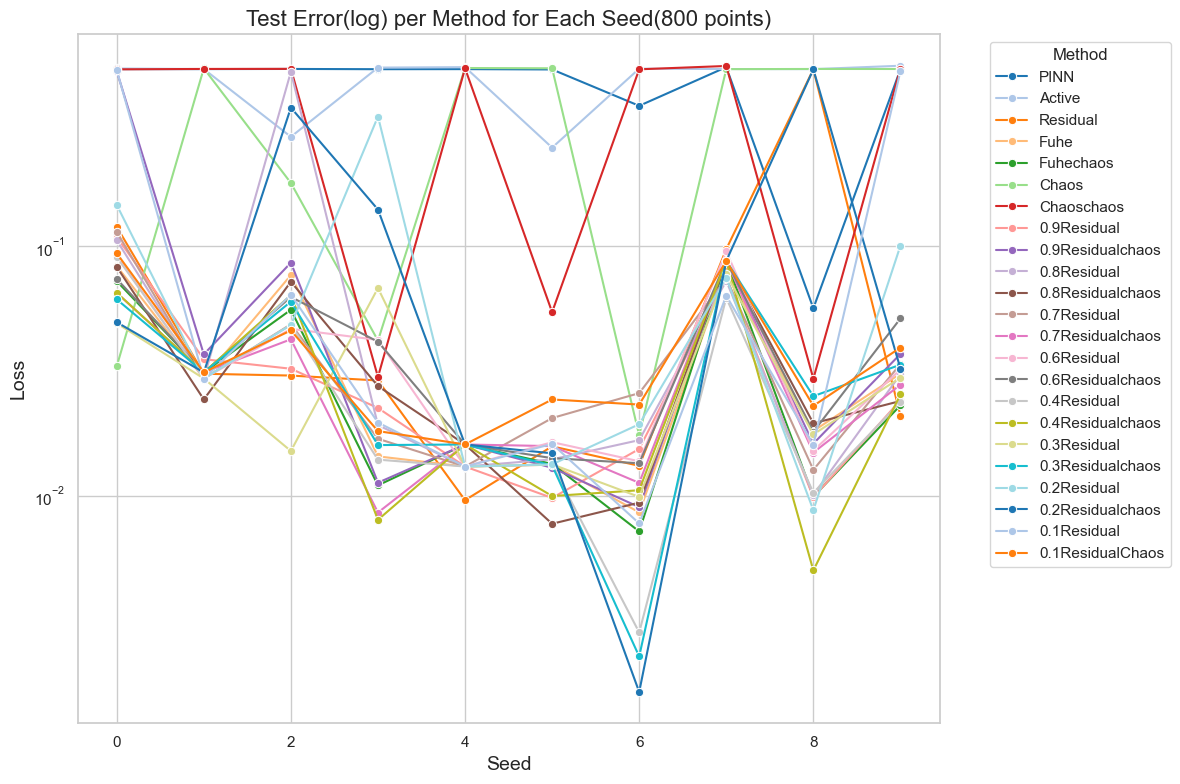

In [61]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')


# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签

plt.title('Test Error(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

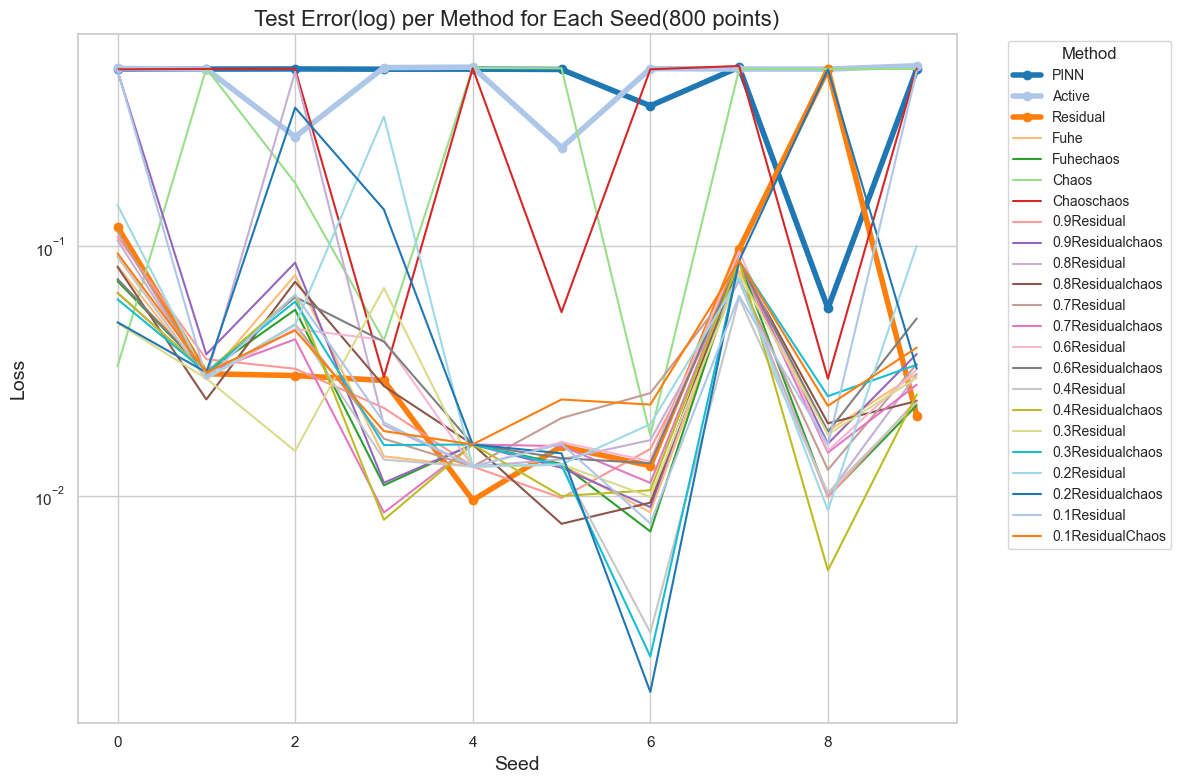

In [62]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active',"Xianxing","25000PINN","tongchengbenPINN","25000Xianxing","tongchengbenXianxing"]
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )

# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('Test Error(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_41244\959944533.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_41244\959944533.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


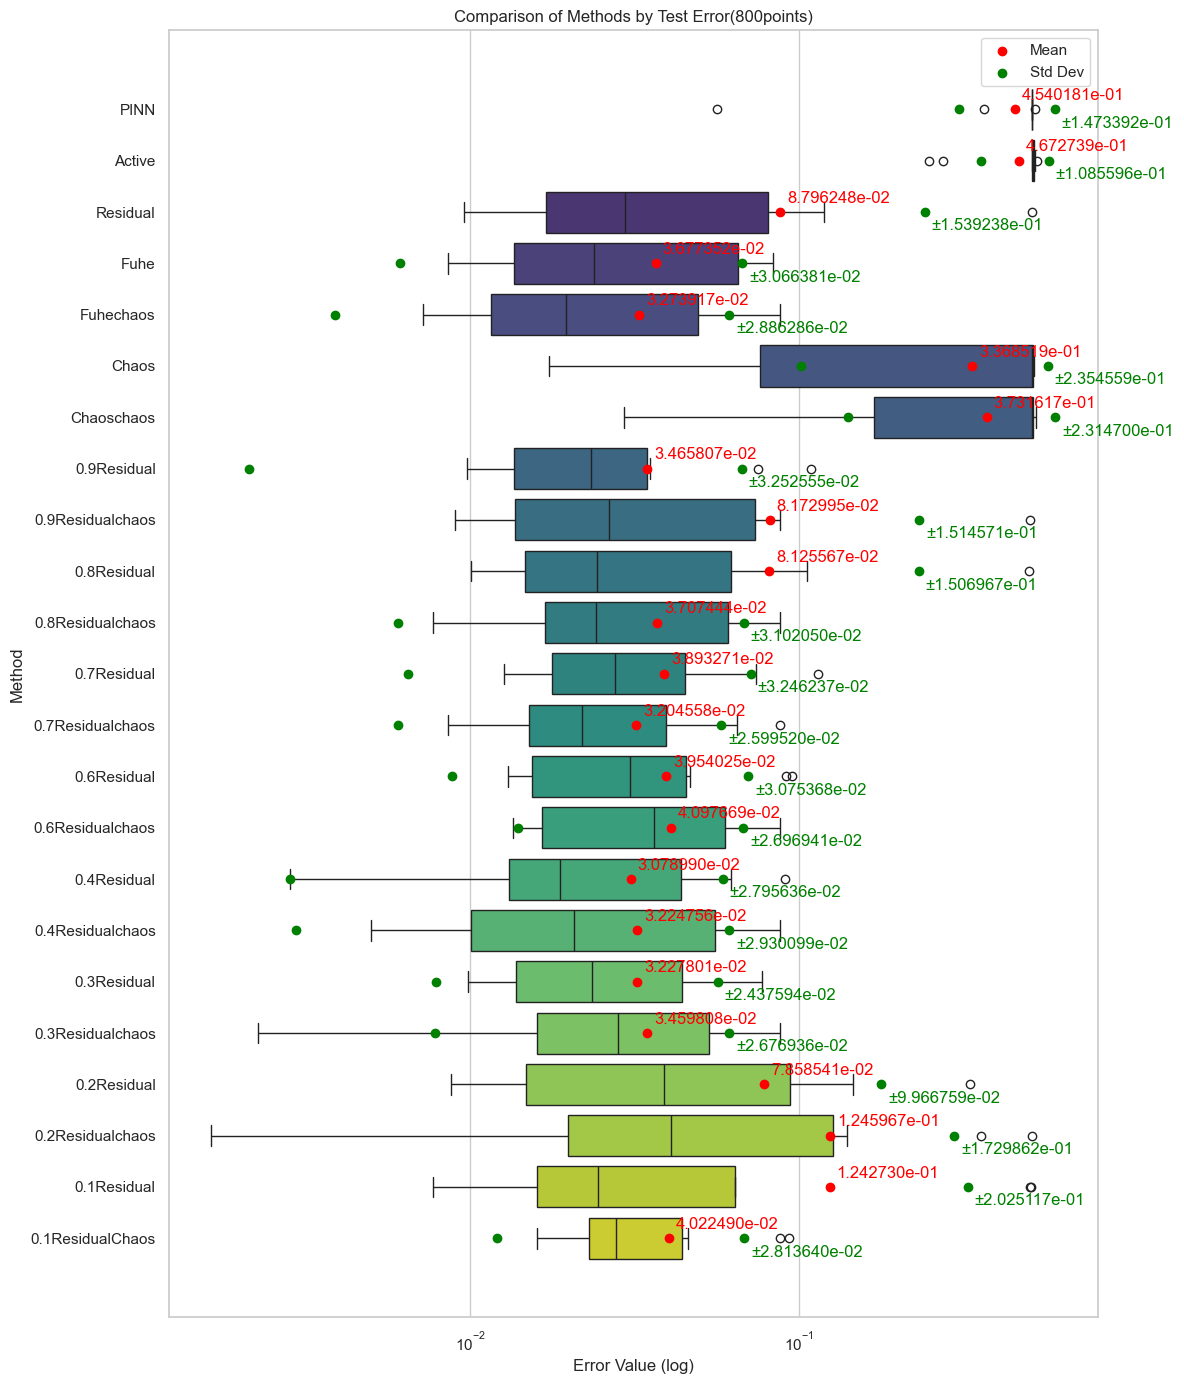

In [63]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 14))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.6e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by Test Error(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

In [64]:
(8.796e-2-3.225e-2)/8.796e-2

0.633356070941337

C:\Users\cheny\AppData\Local\Temp\ipykernel_41244\592110665.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_df = dd.groupby('Method')['Values'].std().reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_41244\592110665.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


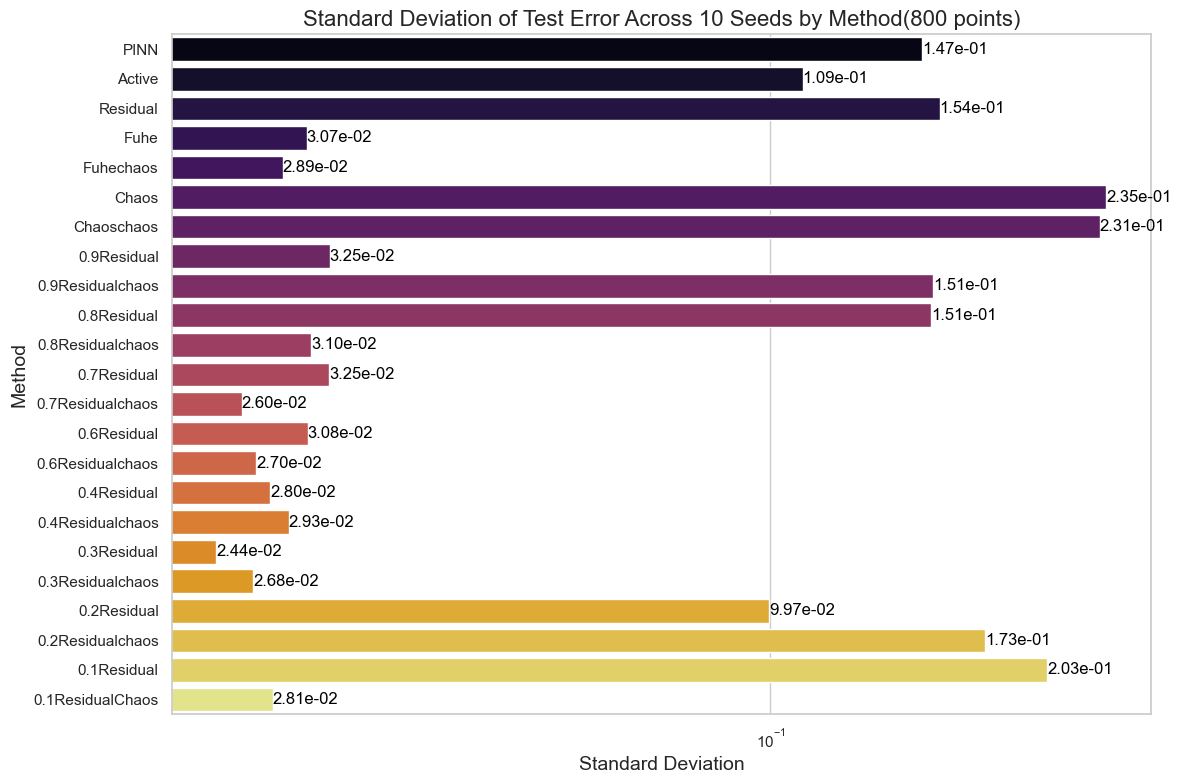

In [65]:
# 计算每种方法在10个seed下的标准差
std_df = dd.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(12, 8))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)

plt.xscale('log')

# 添加标题和轴标签
plt.title('Standard Deviation of Test Error Across 10 Seeds by Method(800 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.000001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()
# 显示图像
plt.show()

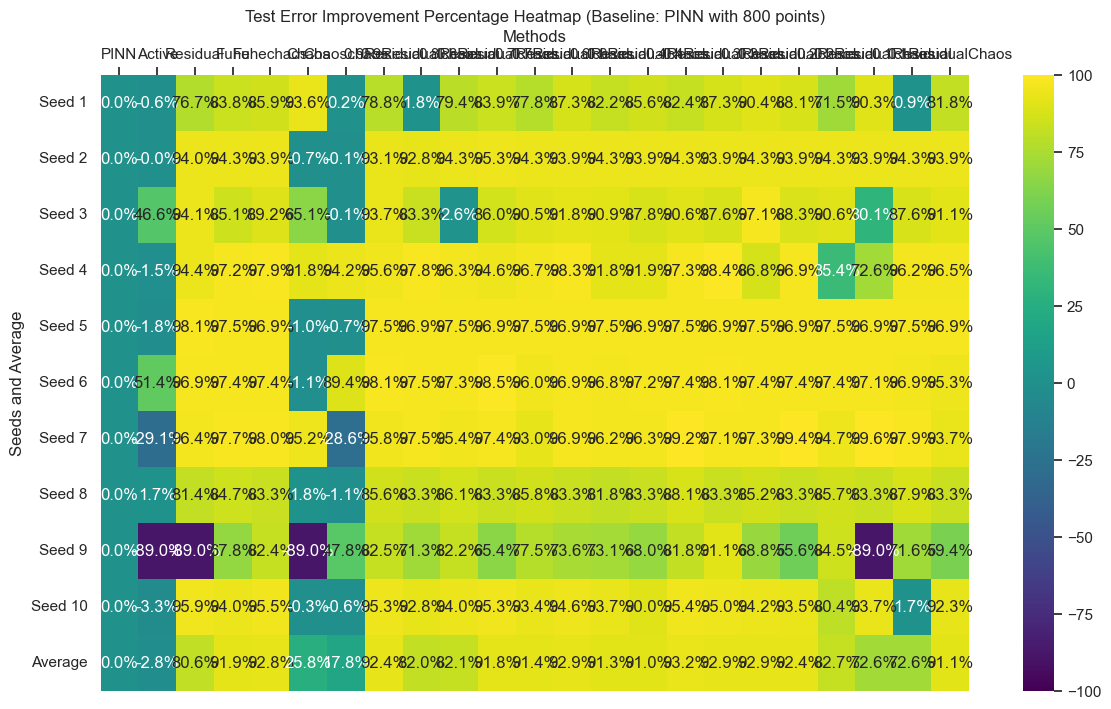

In [66]:
# 选择基准方法
baseline_method = 'PINN'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



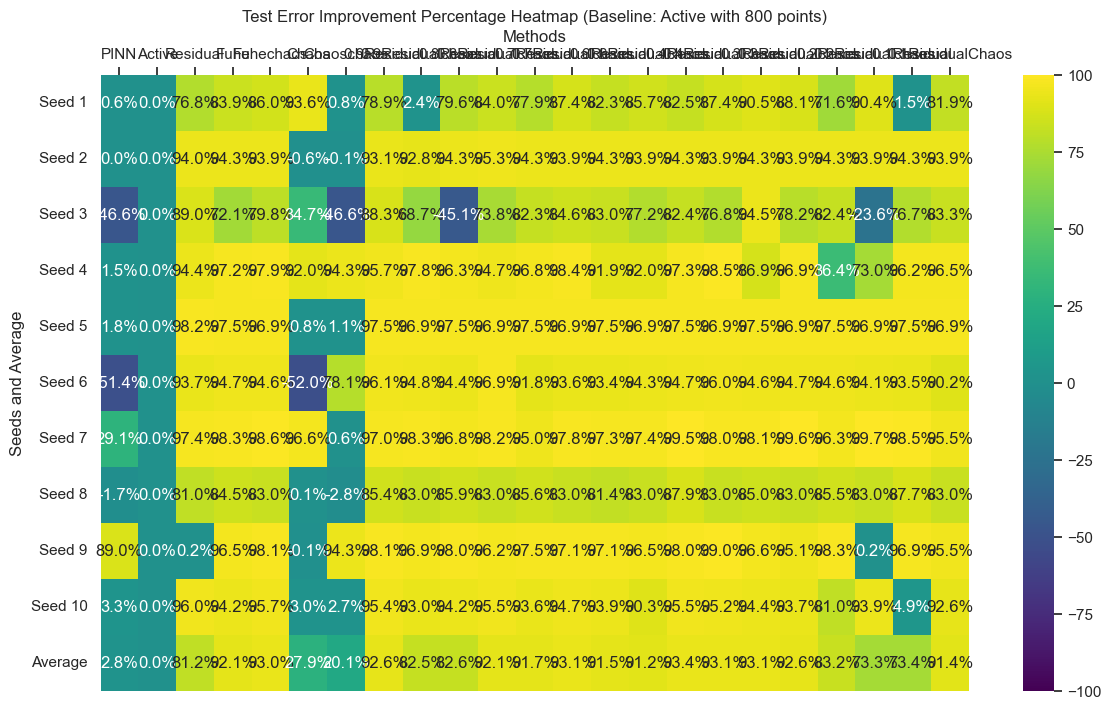

In [67]:
# 选择基准方法
baseline_method = 'Active'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



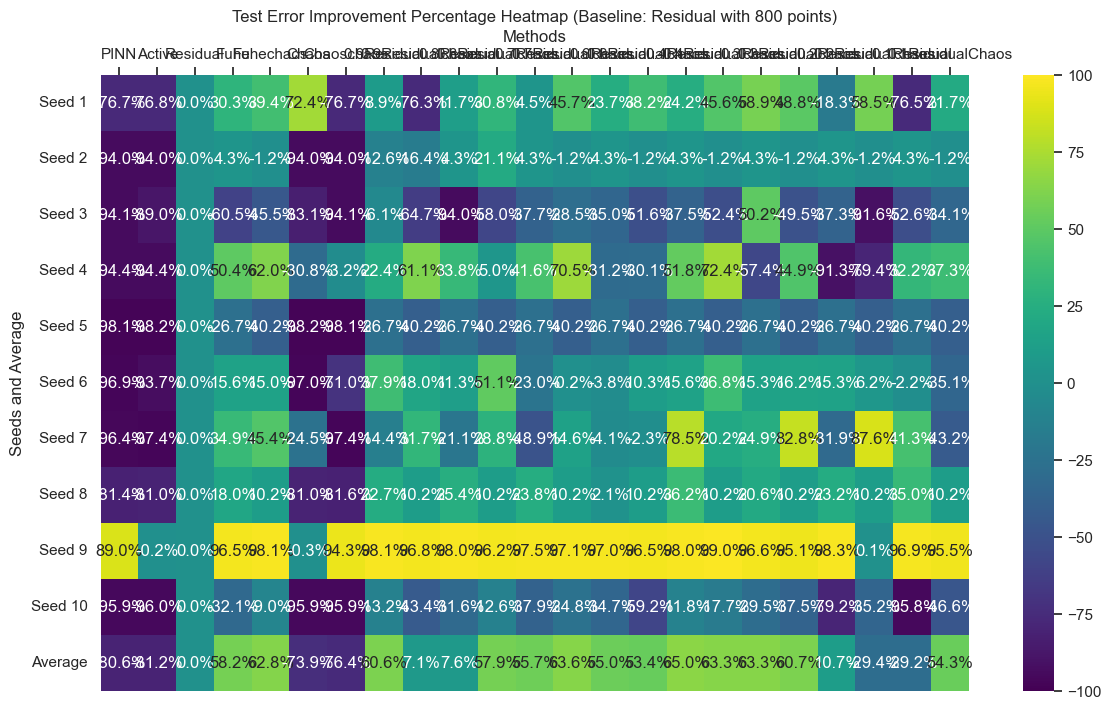

In [68]:
# 选择基准方法
baseline_method = 'Residual'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



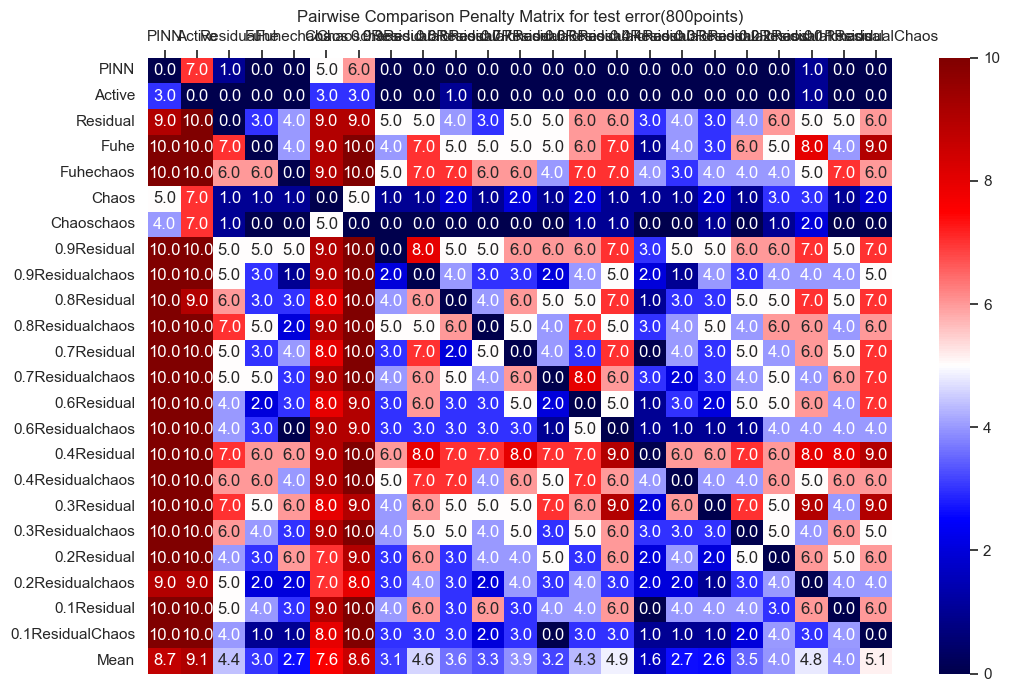

In [69]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for test error(800points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


In [70]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "MAE"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['PINN', 'Active', 'Residual', 'Fuhe', 'Fuhechaos', 'Chaos', 'Chaoschaos', '0.9Residual', '0.9Residualchaos', '0.8Residual', '0.8Residualchaos', '0.7Residual', '0.7Residualchaos', '0.6Residual', '0.6Residualchaos', '0.4Residual', '0.4Residualchaos', '0.3Residual', '0.3Residualchaos', '0.2Residual', '0.2Residualchaos', '0.1Residual', '0.1ResidualChaos']
Seeds: range(0, 10)
Loss Values: {'PINN': [0.18869883018882527, 0.18893554629533396, 0.18938971024827214, 0.18877030149547394, 0.1895155252253112, 0.1880558421793314, 0.09707242564354608, 0.1948892741460637, 0.012780646979463257, 0.18853987986158116], 'Active': [0.19018739733024856, 0.1889073011172612, 0.06190013891353853, 0.19360584779302836, 0.19329633295280668, 0.057815091386661174, 0.19111347837820541, 0.19040017268225295, 0.1891832941654387, 0.1990046659834234], 'Residual': [0.022946181435142658, 0.0055746844853370395, 0.004491458992683739, 0.004952290447341951, 0.0017550903110990703, 0.002882865021814738, 0.002304028014257

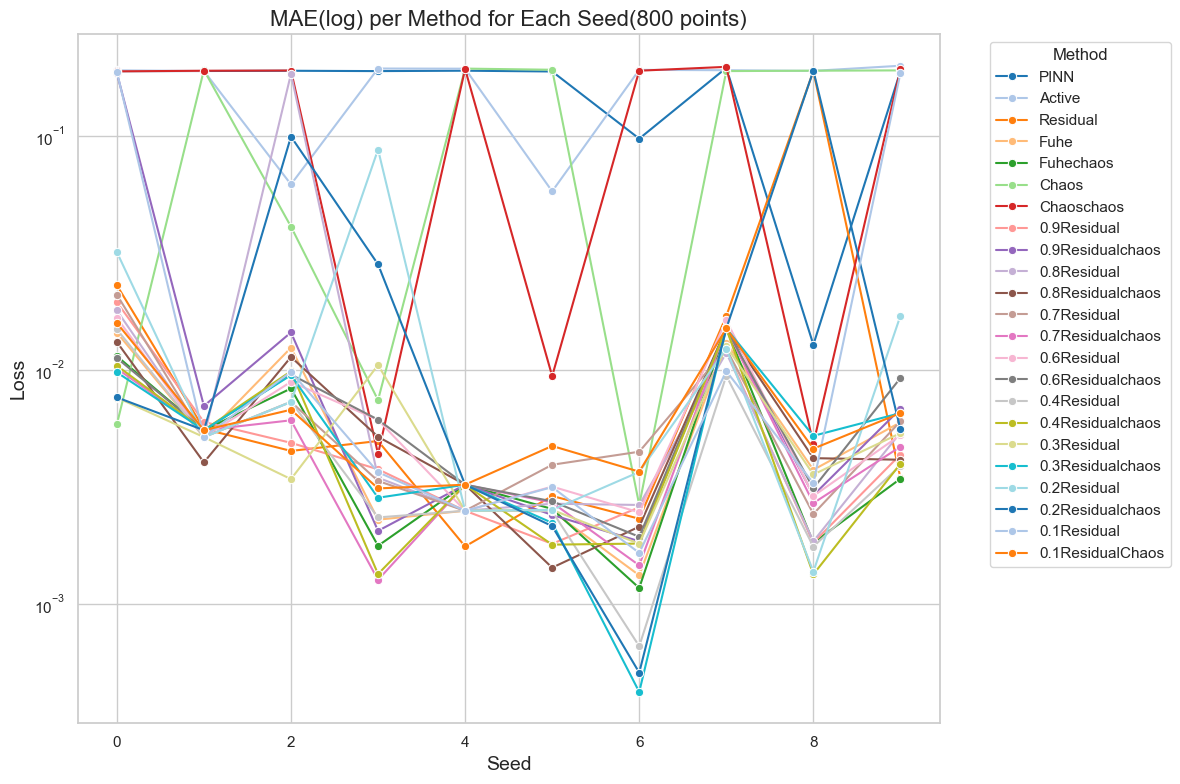

In [71]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)



# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')

# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签
plt.title('MAE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

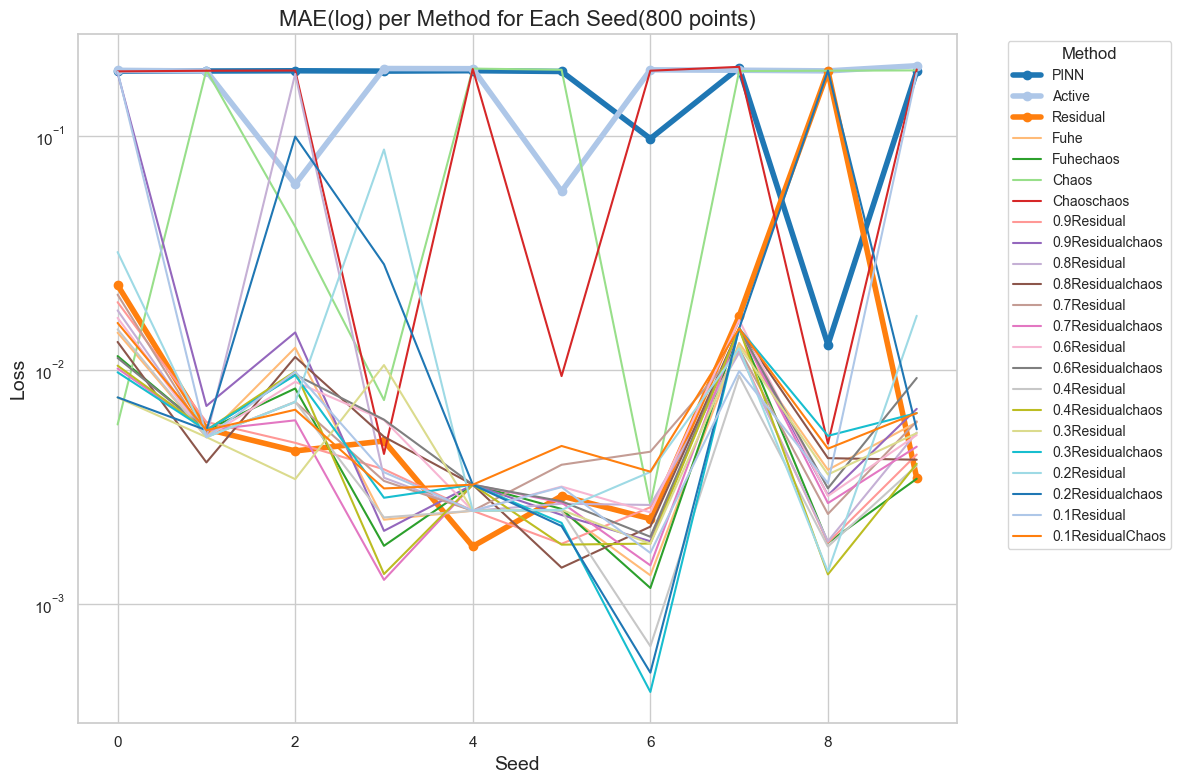

In [72]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )


# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('MAE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_41244\822122591.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_41244\822122591.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


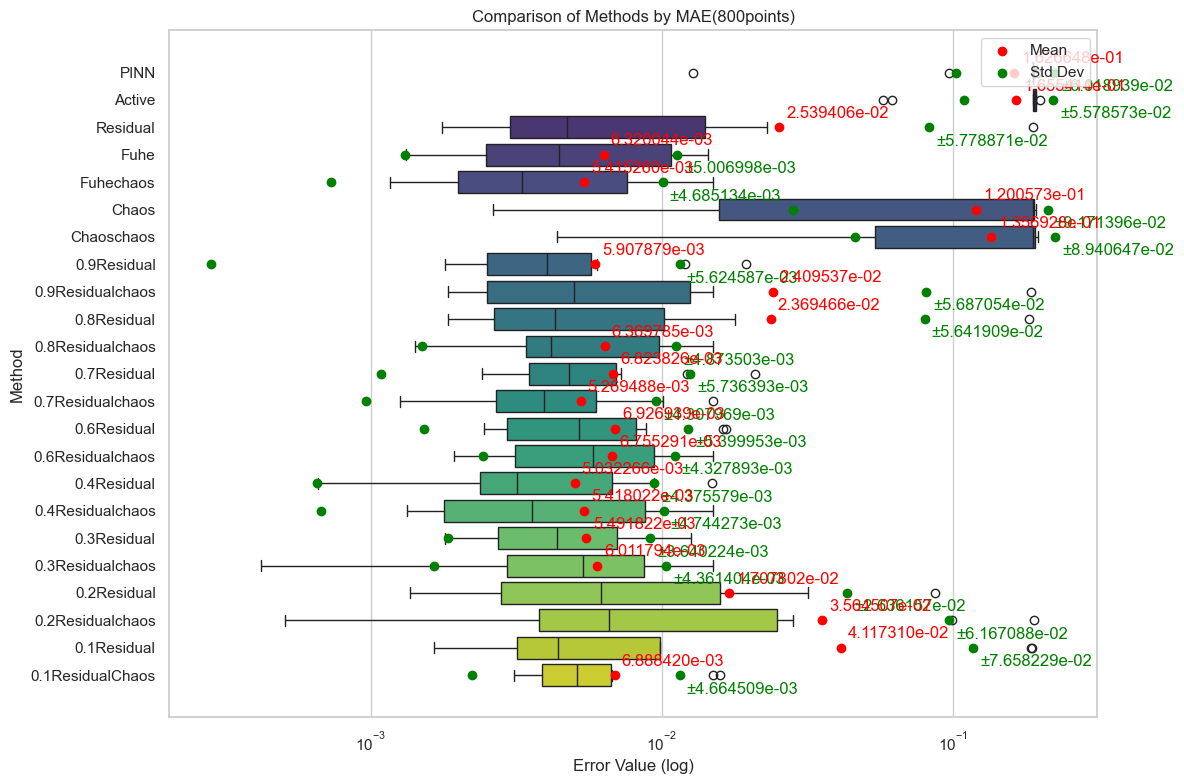

In [73]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.6e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by MAE(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_41244\2556958130.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_df = dd.groupby('Method')['Values'].std().reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_41244\2556958130.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


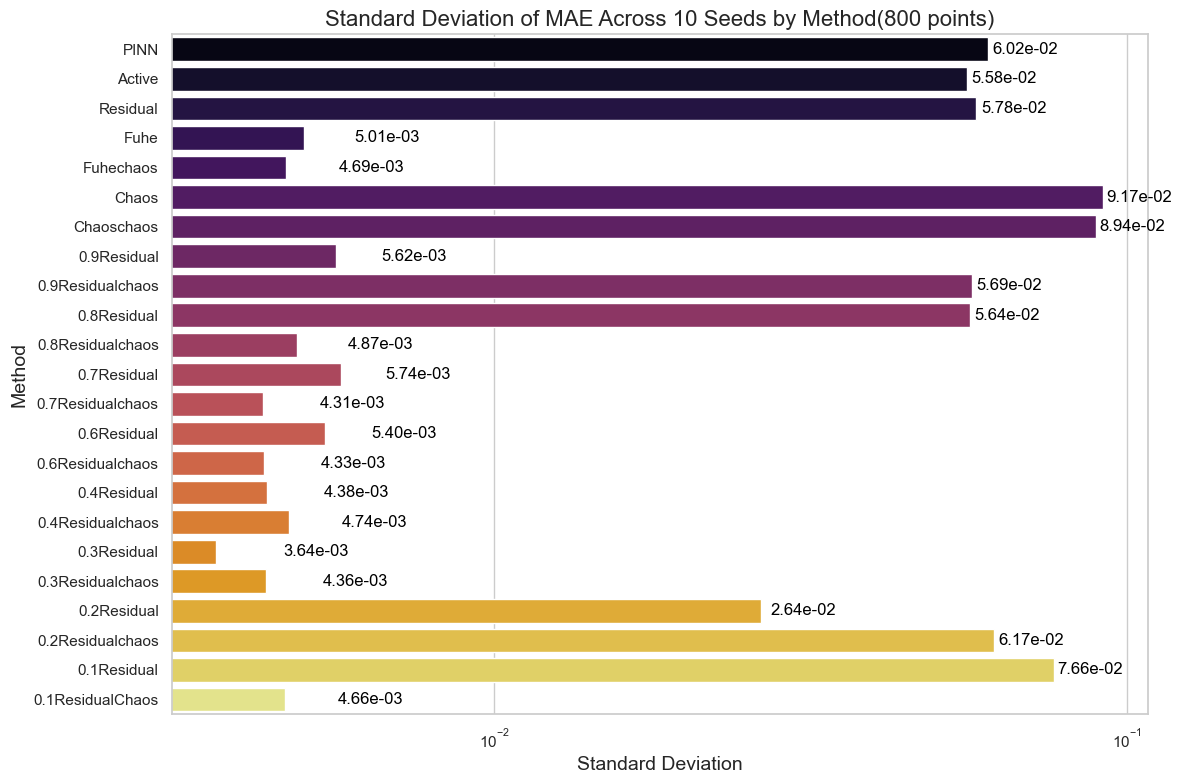

In [74]:
# 计算每种方法在10个seed下的标准差
std_df = dd.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(12, 8))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)

plt.xscale('log')

# 添加标题和轴标签
plt.title('Standard Deviation of MAE Across 10 Seeds by Method(800 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()
# 显示图像
plt.show()

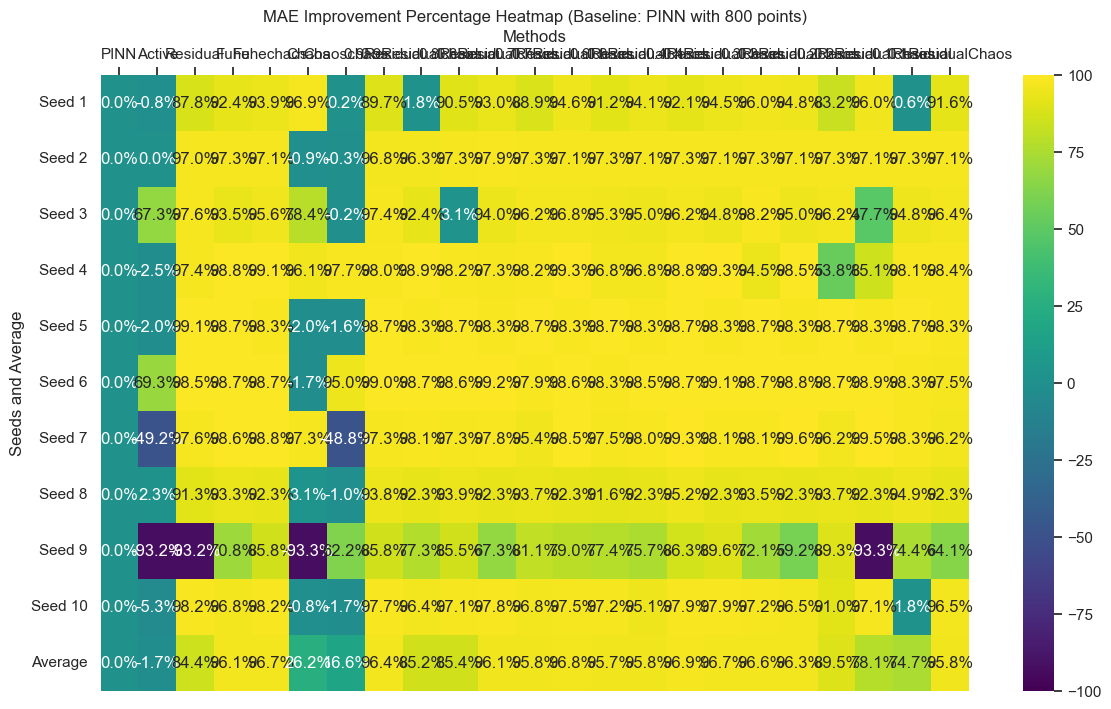

In [75]:
# 选择基准方法
baseline_method = 'PINN'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



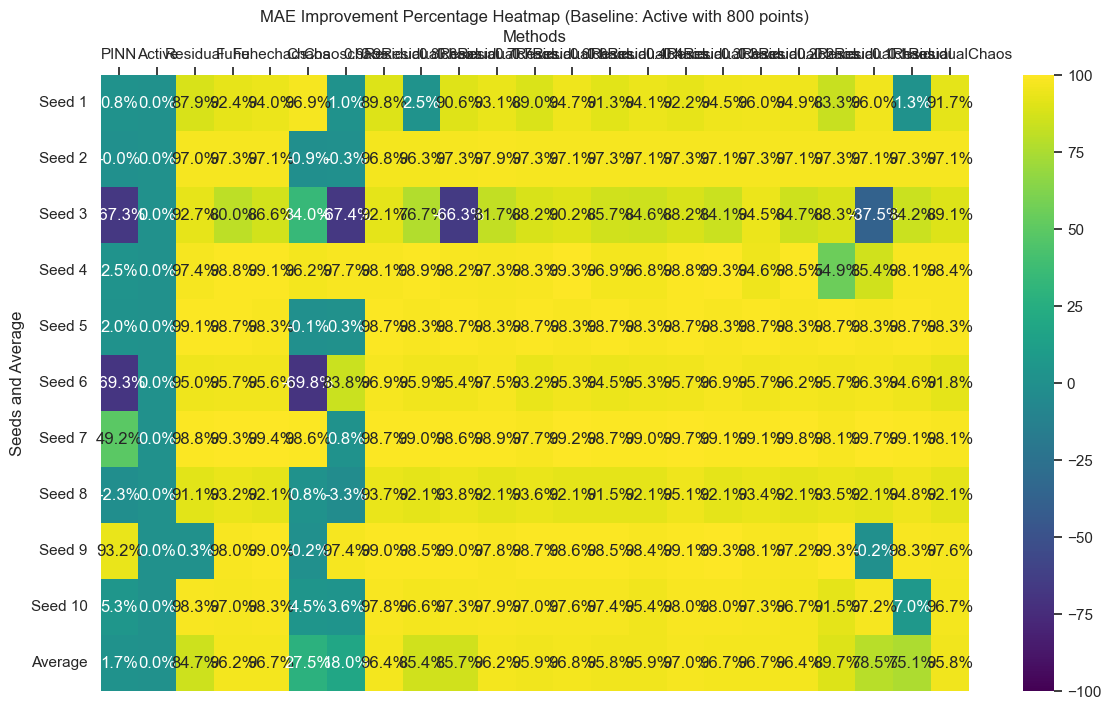

In [76]:
# 选择基准方法
baseline_method = 'Active'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



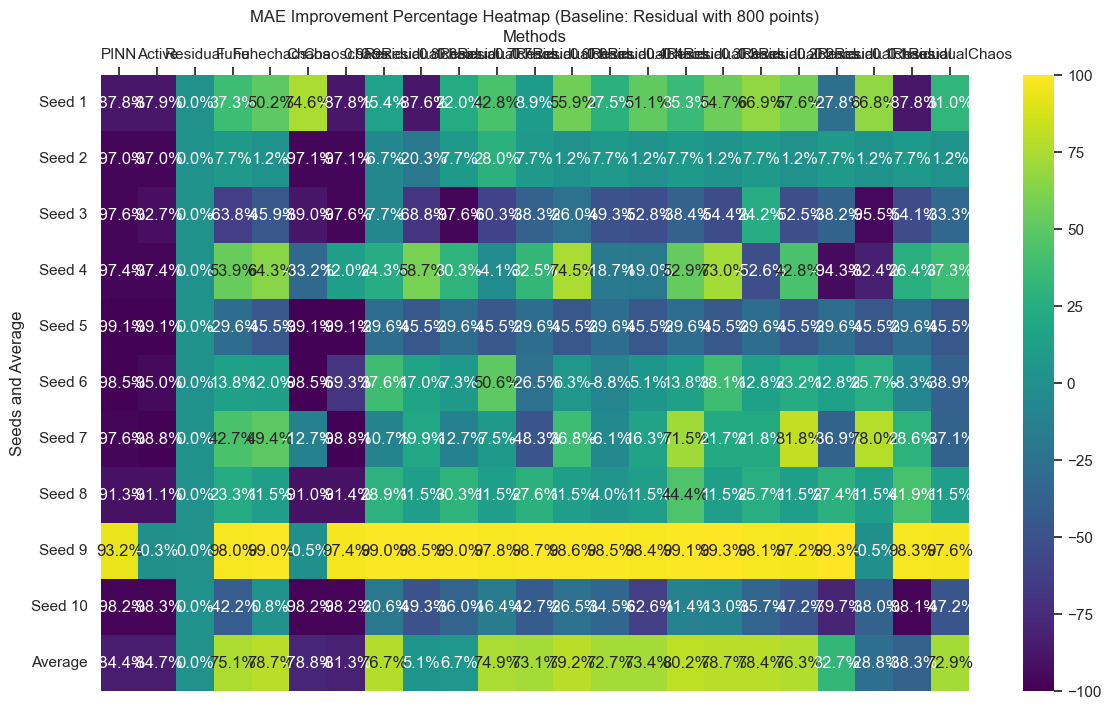

In [77]:
# 选择基准方法
baseline_method = 'Residual'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



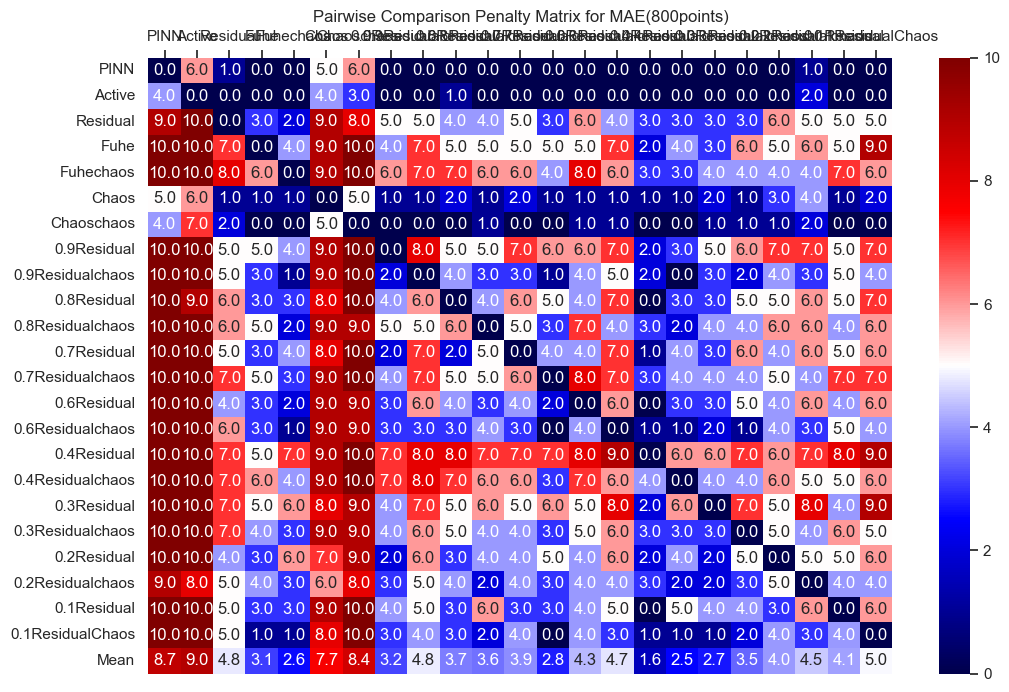

In [78]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for MAE(800points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


In [79]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "MSE"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['PINN', 'Active', 'Residual', 'Fuhe', 'Fuhechaos', 'Chaos', 'Chaoschaos', '0.9Residual', '0.9Residualchaos', '0.8Residual', '0.8Residualchaos', '0.7Residual', '0.7Residualchaos', '0.6Residual', '0.6Residualchaos', '0.4Residual', '0.4Residualchaos', '0.3Residual', '0.3Residualchaos', '0.2Residual', '0.2Residualchaos', '0.1Residual', '0.1ResidualChaos']
Seeds: range(0, 10)
Loss Values: {'PINN': [0.13282715071156512, 0.13286893737942615, 0.13319316987492028, 0.13259025808317368, 0.13276516495415855, 0.13194072730775663, 0.06740931317005687, 0.1377343600504473, 0.001601024691247273, 0.13225328706793518], 'Active': [0.13431868825625753, 0.13292089950091632, 0.03802166156195129, 0.1365853763624559, 0.1376855319524459, 0.031133767676702475, 0.13392122629654157, 0.13298852318651255, 0.13276876130876009, 0.14134428463796178], 'Residual': [0.007200000994392376, 0.0004779459025781704, 0.0004622009191084509, 0.00042192892175832393, 4.625841792279154e-05, 0.00012502506705251492, 8.7251637

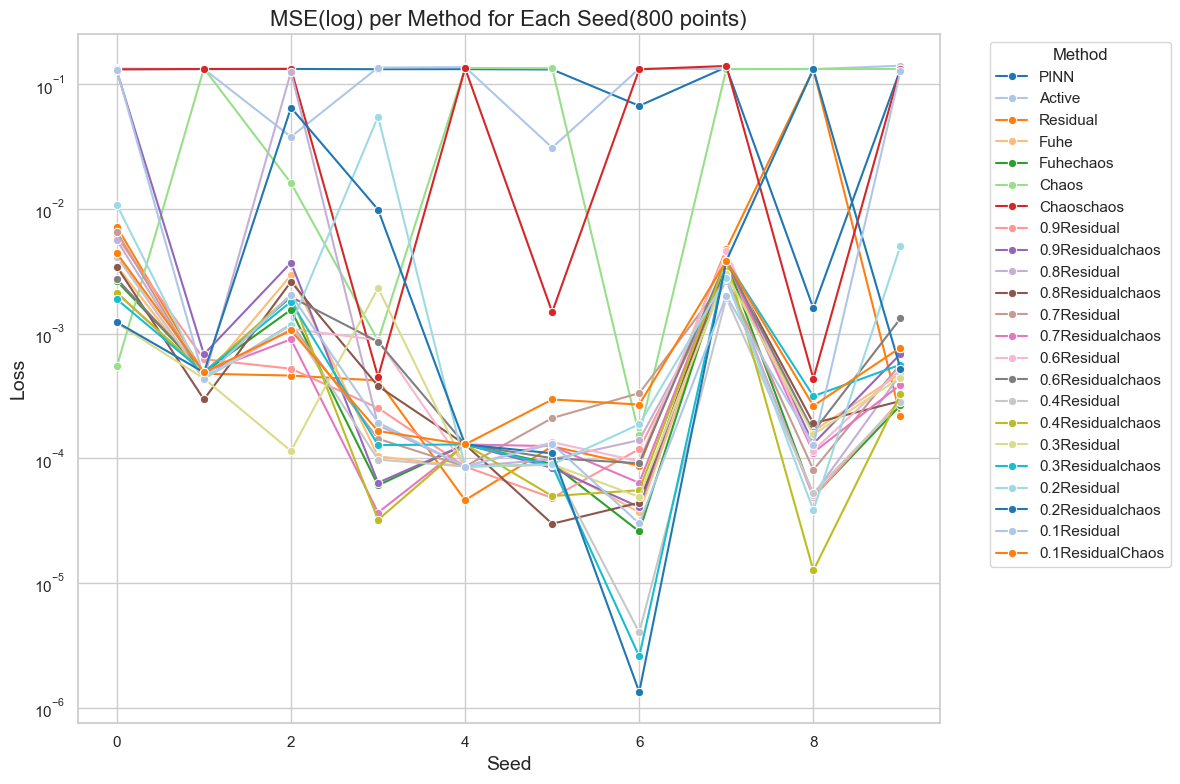

In [80]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')



# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签
plt.title('MSE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

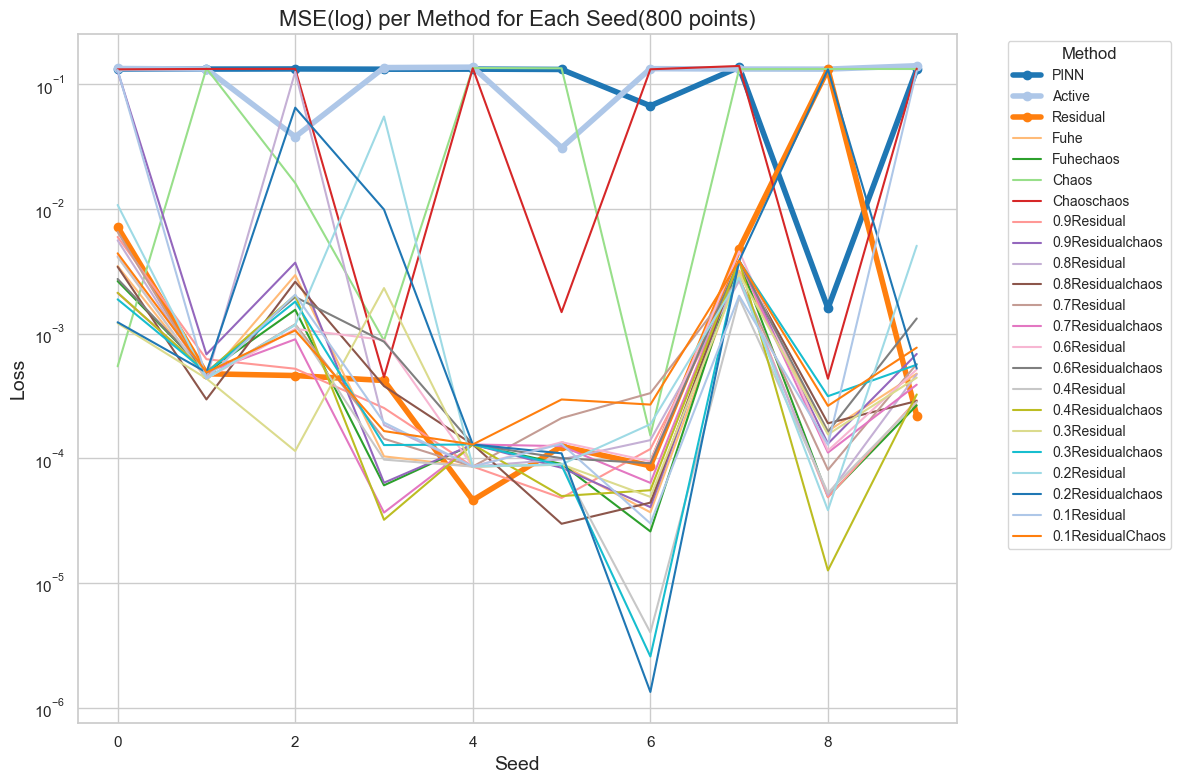

In [81]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )


# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('MSE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_41244\2163168095.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_41244\2163168095.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


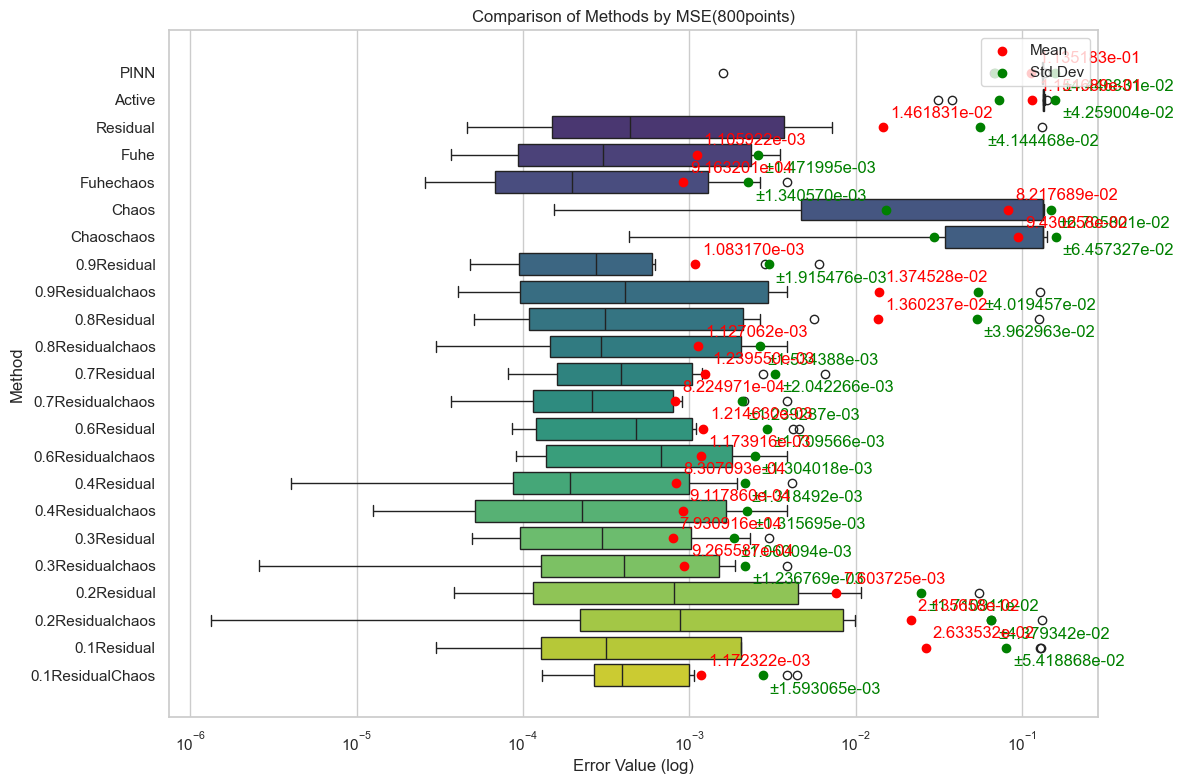

In [82]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.6e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by MSE(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

In [83]:
def rmse_to_mse(rmse):
    """
    将 RMSE 转换为 MSE。
    
    参数:
        rmse (float 或 list 或 numpy array): 均方根误差值
    
    返回:
        mse: 对应的均方误差值
    """
    import numpy as np
    rmse = np.array(rmse)
    mse = rmse ** 2
    return mse

rmse_to_mse(0.0003632)
rmse_to_mse([0.0003632, 0.0131793])

array([1.31914240e-07, 1.73693948e-04])

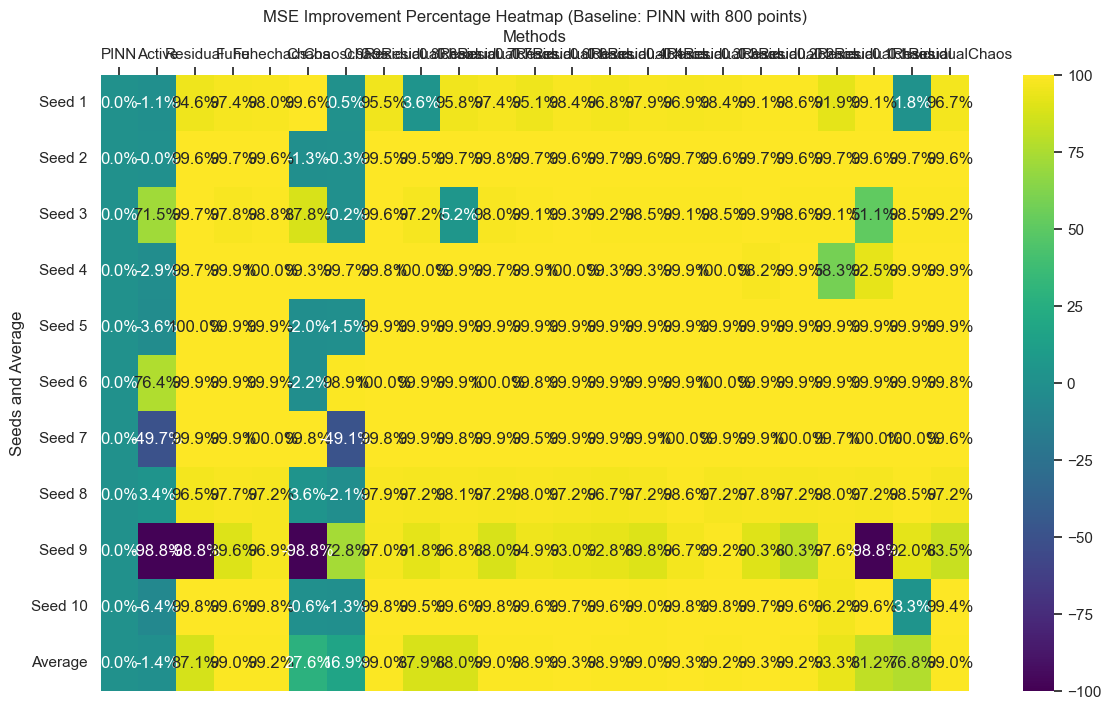

In [84]:
# 选择基准方法
baseline_method = 'PINN'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



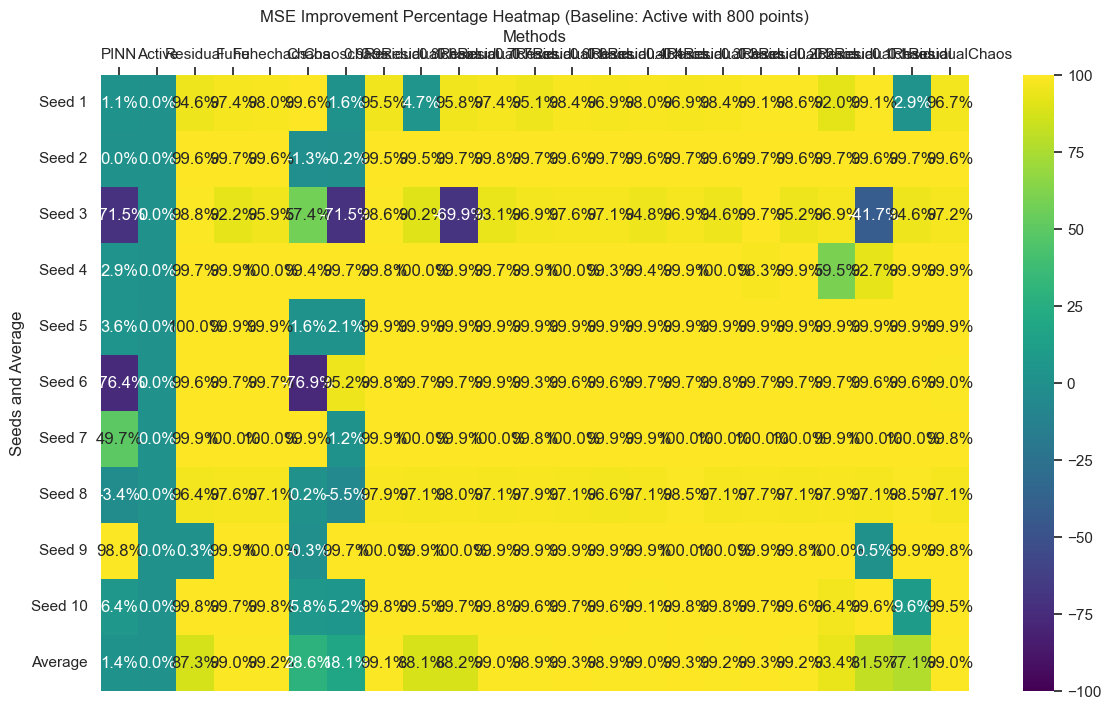

In [85]:
# 选择基准方法
baseline_method = 'Active'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



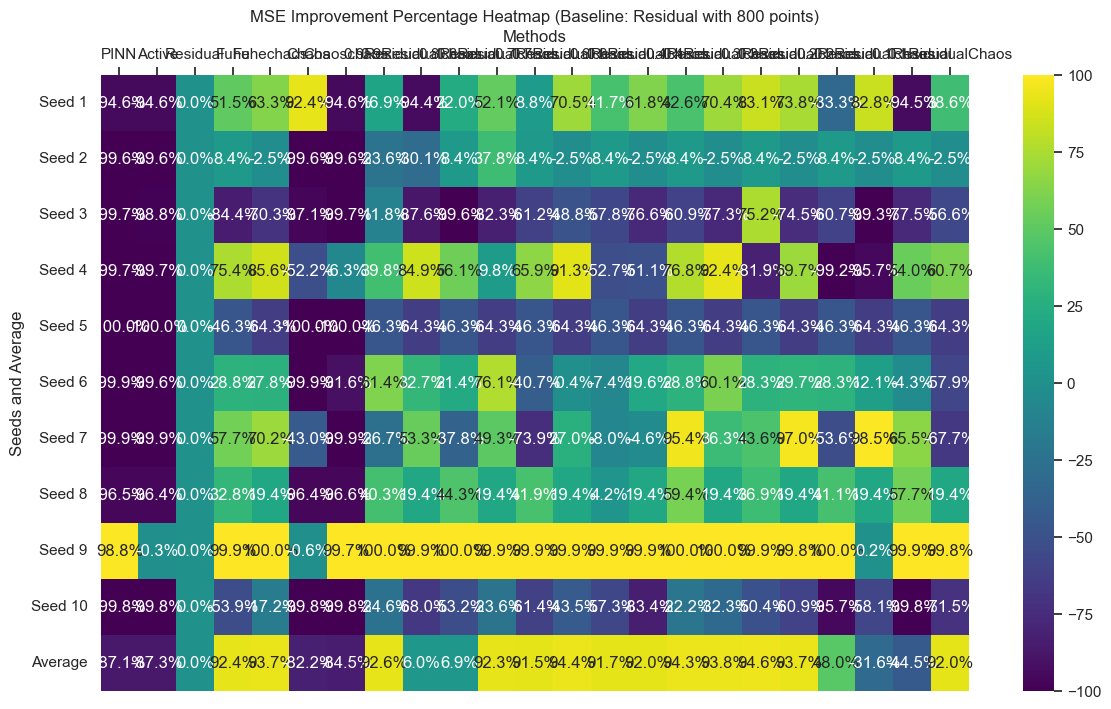

In [86]:
# 选择基准方法
baseline_method = 'Residual'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



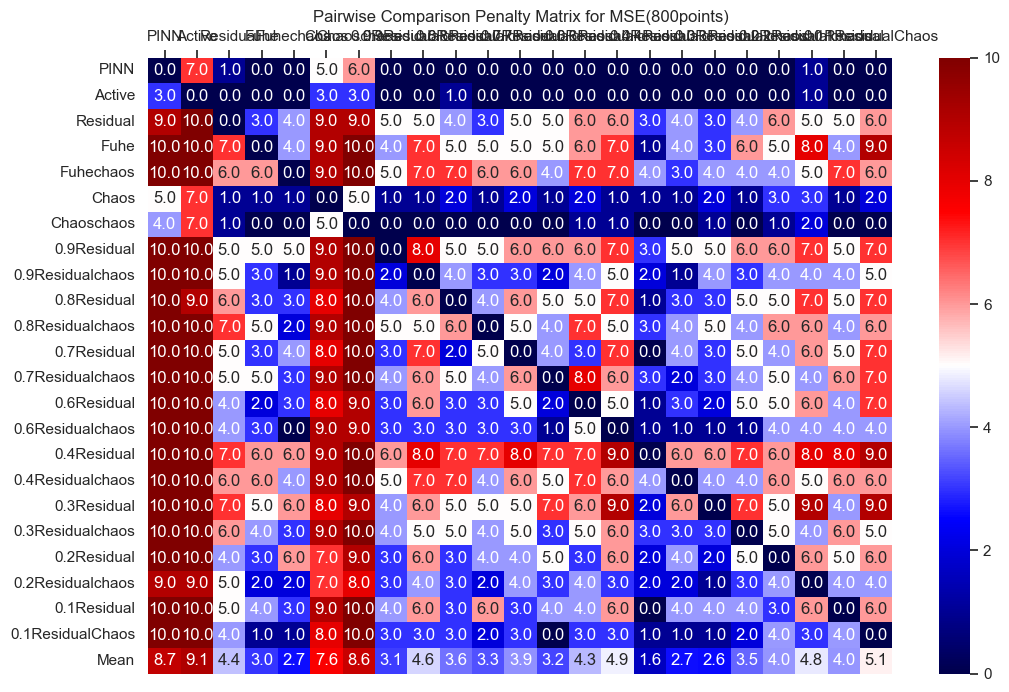

In [87]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for MSE(800points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


In [88]:
np.sqrt(2.889226e-06)

0.0016997723376970223